# Gentle Touch on Mr Bayes

### History
Bayes..., Laplace - who famously set probability that the Sun will rise tomorrow $P(X) = (r+1)/(n+2)$

## Bayesian statistics

The frequentist/Bayesian divide is a philosophical question **"what is probability?"**

- Freq: related to the event frequencies of repeated events

(50:50 chance coin/head, tails, huge number of tosses...)

- Bayes: related to our own certainty or uncertainty of events

(50:50 chance coin/head, tails, we have no information about prioritising one or the other belief...)

We analyze different thigs:

- Freq: variation of data in terms of fixed model parametes

- Bayes: variations of beliefs about parameters in terms of fixed observed data


... kind of opposite approach. Look what varies and what is fixed





$$ \underbrace{P(H \mid D)}_{posterior} = \frac{ \overbrace{P(D \mid H) }^{Likelihood}\, \overbrace{P(H)}^{Prior}}{\underbrace{P(D)}_{Model~ evidence}} $$

<img src="figures/bayes_drinking.png" width="50%">

### Bayes warm-up exercise

In a bag there are two balls, either both black oo (BB) or one black and one red o<font color="red">o</font> (BR).

I pick one ball randomly and it happened to be black.

1. What is the probability that the BB hypothesis is true?

2. What if we repeated the experiment 5 times in total and always picked the black ball? How would it change the probability that the BB hypothesis is true?

$$P(BB | D) = \frac{P(BB) P(D|BB)}{P(D)}$$

and similarly

$$P(BR | D) = \frac{P(BR) P(D|BR)}{P(D)}$$

In [10]:
import numpy as np

# BB, BW
prior = np.array([0.5, 0.5]) # both hypothesis equally probable before we measure
lik = np.array([1., 0.5]) # prob to draw B from BB, prob to draw B from BW
h = prior*lik
Z = np.sum(h)
posterior = h/Z
posterior

array([0.66666667, 0.33333333])

In [11]:
# now we draw B 5x
prior = np.array([0.5, 0.5]) # both hypothesis equally probable before we measure
lik = np.array([1., 0.5**5]) # prob to draw 5x B from BB, prob to draw 5x B from BW
h = prior*lik
Z = np.sum(h)
posterior = h/Z
posterior

array([0.96969697, 0.03030303])

Now imagine that you know after the first draw that the probability $P(BB) = 2/3$. You can view it as a new updated prior and do the remaining 4 experiments:

In [12]:
# now we draw B 5x
prior = np.array([0.66666667, 0.33333333]) # both hypothesis equally probable before we measure
lik = np.array([1., 0.5**4]) # prob to draw 5x B from BB, prob to draw 5x B from BW
h = prior*lik
Z = np.sum(h)
posterior = h/Z
posterior

array([0.96969697, 0.03030303])

*Today's posterior is tomorrow's prior*

Similarly, if you start with a very biased prior, you need lot of data to get convinced, in other words *Extra-ordinary claims require extra-ordinary evidence*!

## Let's measure flux of a star

In [13]:
import matplotlib.pyplot as plt
from scipy import stats

In [14]:
# Generating some simple photon count data
np.random.seed(1)  # for repeatability

F_true = 1000  # true flux, say number of photons measured in 1 second
N = 50 # number of measurements
F = stats.poisson(F_true).rvs(N)  # N measurements of the flux
e = np.sqrt(F)  # errors on Poisson counts estimated via square root

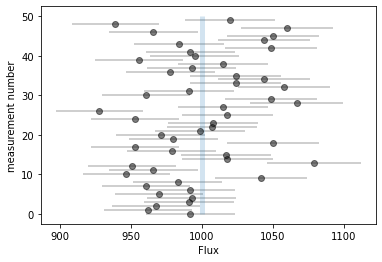

In [15]:
plt.errorbar(F, np.arange(N), xerr=e, fmt='ok', ecolor='gray', alpha=0.5)
plt.vlines([F_true], 0, N, linewidth=5, alpha=0.2)
plt.xlabel("Flux");plt.ylabel("measurement number");

**Frequentist approach** discussed last time, maximum likelihood $\mathcal{L}(D|F_{\rm true}) = \Pi_i^N P(D_i | F_{true})$, that analytically leads to minimising the least square error, which turns to be, in other words, weighted averaging

<img src="figures/likelihood.png" width="50%">

In [16]:
w = 1. / e ** 2

wavg = (w * F).sum() / w.sum()
werr = w.sum() ** -0.5
print("F_true = ", F_true)
print("F_estimated = ", wavg, "+/-", werr)

F_true =  1000
F_estimated =  997.679324193871 +/- 4.4669437520386825


### While the Bayesian...
The Bayesian approach is to compute our knowledge of the parameters:

$$ P(F_{\rm true}~|~D) $$

Note that this formulation of the problem is *fundamentally contrary* to the frequentist philosophy, which says that *probabilities have no meaning for model parameters* like $F_{\rm true}$. Nevertheless, within the Bayesian philosophy this is perfectly acceptable. 

To compute this result, apply Bayes' Theorem

$$ P(F_{\rm true}~|~D) = \frac{P(D~|~F_{\rm true})~P(F_{\rm true})}{P(D)} $$


- $P(F_{\rm true}~|~D)$: The **posterior**, or the probability of the model parameters given the data: this is the result we want to compute.
- $P(D~|~F_{\rm true})$: The **likelihood**, which is proportional to the $\mathcal{L}(D~|~F_{\rm true})$ in the frequentist approach, above.
- $P(F_{\rm true})$: The **model prior**, which encodes what we knew about the model prior to the application of the data $D$.
- $P(D)$: The **data probability**, which in practice amounts to simply a normalization term.


$$ \underbrace{P(\theta \mid D)}_{posterior} = \frac{ \overbrace{P(D \mid \theta) }^{Likelihood}\, \overbrace{P(\theta)}^{Prior}}{\underbrace{P(D)}_{Model~ evidence}} $$

If we set the prior $P(F_{\rm true}) \propto 1$ (a *flat prior* or a *non-informative*), we find

$$P(F_{\rm true}|D) \propto \mathcal{L}(D|F_{\rm true})$$

and the Bayesian probability is maximized at precisely the same value as the frequentist result!

So despite the philosophical differences, we see that (for this simple problem at least) the Bayesian and frequentist point estimates are equivalent.

But there are cases where the Freq and Bayes are not equal:

- prior (cosmological parameters from CMB, SNe...)
- handling of nuisance parameters
- interpretation of unceratainty
- comparison of models


The posterior probability $P(F_{\rm true}~|~D)$ as a function of $F_{\rm true}$: this is the distribution reflecting our knowledge of the parameter $F_{\rm true}$.

But as the dimension of the model grows, this direct approach becomes increasingly intractable. For this reason, Bayesian calculations often depend on sampling methods such as [Markov Chain Monte Carlo (MCMC)](http://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo).

And the MCMC hammer in Python - that will sample the posterior probability for us - is called [emcee](https://emcee.readthedocs.io/en/stable/). For the purpose of today's lecture consider it a black-box that you provide data, priors and likelihoods (in the log form) and it returns the posterior *distribution* of probabilities (by calculating the integral for you in a smart way)

In [17]:
def log_prior(theta):
    return 1.  # flat prior

def log_likelihood(theta, F, e):
    return -0.5 * np.sum(np.log(2 * np.pi * e ** 2)
                         + (F - theta[0]) ** 2 / e ** 2)

def log_posterior(theta, F, e):
    return log_prior(theta) + log_likelihood(theta, F, e)

In [18]:
ndim = 1  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 1000  # "burn-in" period to let chains stabilize
nsteps = 2000  # number of MCMC steps to take

# we'll start at random locations between 0 and 2000
starting_guesses = 2000 * np.random.rand(nwalkers, ndim)

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[F, e])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].ravel()  # discard burn-in points

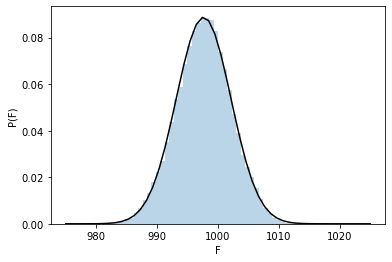

In [19]:
# plot a histogram of the sample
plt.hist(sample, bins=50, alpha=0.3, density=True)

# plot a best-fit Gaussian
F_fit = np.linspace(975, 1025)
pdf = stats.norm(np.mean(sample), np.std(sample)).pdf(F_fit)

plt.plot(F_fit, pdf, '-k')
plt.xlabel("F"); plt.ylabel("P(F)");

In [20]:
print("F_true = ",F_true)
print("F_estimated  = ", np.mean(sample), "+/- ", np.std(sample))

F_true =  1000
F_estimated  =  997.6402683205047 +/-  4.495183699281103


The results are the same. Not a big surprise, because $P(F_{\rm true}|D) \propto \mathcal{L}(D|F_{\rm true})$.

But notice, that the construction was different. The frequentists build likelihood and (with maximum likelihood) pick one value that yields the highest likelihood. While, the Bayesians consider likelihood as a distribution and compute the expected value of it. Both approaches work identically well e.g. for a Gaussian distribution of likelihood (in our flux example) however, they don't have to yield the same results for asymmetric distributions of likelihood.

## Nuisance parameters
A nuisance parameter is any quantity whose value is not relevant to the goal of an analysis, but is nevertheless required to determine the result.

## The Bayesian Billiard Game

- the first ball divides the table
- additional rolls give points to A or B
- first person who gets 6 points wins

<img src="figures/Bayes_game_board.png">

<img src="figures/black_board.png">

Question: In a certain game Alice has 5 points and Bob has 3 points. What are the odds that Bob will win?

Frequentist Approach:

$\hat{p} =5/8$

$P(B)=(1−\hat{p})^3$

In [21]:
p_hat = 5. / 8.
freq_prob = (1 - p_hat) ** 3
print("Frequentist Probability of Bob Winning: %.2f"%freq_prob)
print("Odds {0:0.0f} to 1".format((1. - freq_prob)/ freq_prob))

Frequentist Probability of Bob Winning: 0.05
Odds 18 to 1


### Bayesian approach

- $B$ = Bob wins
- $D$ = observed data, i.e. $D = (n_A, n_B) = (5, 3)$
- $p$ = unknown probability that a ball lands on Alice's side during the current game

We want to compute $P(B~|~D)$; that is, the probability that Bob wins given our observation that Alice currently has five points to Bob's three.

The general Bayesian method of treating nuisance parameters is *marginalization*, or integrating the joint probability over the entire range of the nuisance parameter. In this case, that means that we will first calculate the joint distribution
$$
P(B,p~|~D)
$$
and then marginalize over $p$ using the following identity:
$$
P(B~|~D) \equiv \int_{-\infty}^\infty P(B,p~|~D) {\mathrm d}p
$$
This identity follows from the definition of conditional probability, and the law of total probability: that is a fundamental consequence of probability axioms and will always be true.

We'll start by applying the following definition of [conditional probability](http://en.wikipedia.org/wiki/Conditional_probability#Definition) to expand the term $P(B,p~|~D)$:

$$
P(B~|~D) = \int P(B~|~p, D) P(p~|~D) dp
$$

Next we use [Bayes' rule](http://en.wikipedia.org/wiki/Bayes%27_theorem) to rewrite $P(p~|~D)$:

$$
P(B~|~D) = \int P(B~|~p, D) \frac{P(D~|~p)P(p)}{P(D)} dp
$$

Finally, using the same probability identity we started with, we can expand $P(D)$ in the denominator to find:

$$
P(B~|~D) = \frac{\int P(B~|~p,D) P(D~|~p) P(p) dp}{\int P(D~|~p)P(p) dp}
$$

Now the desired probability is expressed in terms of three quantities that we can compute. Let's look at each of these in turn:

- $P(B~|~p,D)$: This term is exactly the frequentist likelihood we used above. In words: given a marker placement $p$ and the fact that Alice has won 5 times and Bob 3 times, what is the probability that Bob will go on to six wins?  Bob needs three wins in a row, i.e. $P(B~|~p,D) = (1 - p) ^ 3$.
- $P(D~|~p)$: this is another easy-to-compute term. In words: given a probability $p$, what is the likelihood of exactly 5 positive outcomes out of eight trials? The answer comes from the well-known [Binomial distribution](http://en.wikipedia.org/wiki/Binomial_distribution): in this case $P(D~|~p) \propto p^5 (1-p)^3$
- $P(p)$: this is our prior on the probability $p$. By the problem definition, we can assume that $p$ is evenly drawn between 0 and 1.  That is, $P(p) \propto 1$, and the integrals range from 0 to 1.

Putting this all together, canceling some terms
$$
P(B~|~D) = \frac{\int_0^1 (1 - p)^6 p^5 dp}{\int_0^1 (1 - p)^3 p^5 dp}
$$

These integrals can be solved semi-analytically using [Beta Function](http://en.wikipedia.org/wiki/Beta_function):
$$
\beta(n, m) = \int_0^1 (1 - p)^{n - 1} p^{m - 1}
$$

In [22]:
from scipy.special import beta
bayes_prob = beta(6 + 1, 5 + 1) / beta(3 + 1, 5 + 1)

print("P(B|D) = {0:.2f}".format(bayes_prob))

print("Bayesian odds {0:.0f} to 1".format((1. - bayes_prob) / bayes_prob))


P(B|D) = 0.09
Bayesian odds 10 to 1


### 0.05 vs 0.09, so who is right?

In [23]:
np.random.seed(0)

# play 100000 games with randomly-drawn p, between 0 and 1
p = np.random.random(100000)

# each game needs at most 11 rolls for one player to reach 6 wins
rolls = np.random.random((11, len(p)))

# count the cumulative wins for Alice and Bob at each roll
Alice_count = np.cumsum(rolls < p, 0)
Bob_count = np.cumsum(rolls >= p, 0)

# sanity check: total number of wins should equal number of rolls
total_wins = Alice_count + Bob_count
assert np.all(total_wins.T == np.arange(1, 12))
print("(Sanity check passed)")

# determine number of games which meet our criterion of (A wins, B wins)=(5, 3)
# this means Bob's win count at eight rolls must equal 3
good_games = Bob_count[7] == 3
print("Number of suitable games: ", good_games.sum())

# truncate our results to consider only these games
Alice_count = Alice_count[:, good_games]
Bob_count = Bob_count[:, good_games]

# determine which of these games Bob won.
# to win, he must reach six wins after 11 rolls.
bob_won = np.sum(Bob_count[10] == 6)
print("Number of these games Bob won: ", bob_won.sum())

# compute the probability
mc_prob = bob_won.sum() * 1. / good_games.sum()
print("Monte Carlo Probability of Bob winning: %.2f" % mc_prob)
print("MC Odds against Bob winning: %.0f to 1" % ((1. - mc_prob) / mc_prob))

(Sanity check passed)
Number of suitable games:  11068
Number of these games Bob won:  979
Monte Carlo Probability of Bob winning: 0.09
MC Odds against Bob winning: 10 to 1


<img src="figures/game_freq.png" width="50%">
<img src="figures/game_bayes.png" width="50%">

See the difference between the (frequentist) single point estimate $\hat{p}$ vs the (Bayesian) entire probability distribution of $P(p)$.

The nuisance paramter $p$ is fixed in the frequentist way while it can vary in the Bayesian way.

In the frequentist's approach the parameters are fixed. They can't vary. It makes sense, recall that the paramater values were found e.g. by maximasing the likelihood, the extrem of the likelihood happens at a single point in the parametric space.

### Earthquake exercise

<img src="figures/spitak.jpg" width="50%">

There were 20 earthquakes observed in last 20.000 years. What is the probability of having an earthquake within next 50 years?

Calculate it first using the frequentist approach, then the Bayesian approach, and compare.

You may use your favourite $R$ if you like.

Assume, the earthquakes follow the Poission distribution

$$P(x, \lambda) =  \frac{\lambda^x \exp(-\lambda)}{x!}$$

where $\lambda$ is the earthquake rate in a unit time period.

## Uncertainties: Confidence interval vs Credibility interval

What does it mean $\theta = 999 \pm 4$ ?

- Freq: If the experiment is repeated many times, in 95% of these cases (data points generated from the fixed parameter) the computed confidence interval will contain the true value $\theta$


- Bayes: Given our observed data, there is a 95% probability that the value of $\theta$ lies within the credible region

Notice again what varies and what is fixed!

<img src="figures/confidence_credibility.png" width="50%">

But in principle, we may have happend to observe the interval generated the data points generated with 5% chance...

<img src="figures/confidence_credibility_fail.png" width="50%">

A frequentist 95% confidence interval is **not** 95% likely to contain the true value!

This is a very common mistake, and it's a Bayesian interpretation of a frequenctist construct.

The interpretation of confidence, the credibility interval is very natural: 95% creedibilty interval is the area under the posterior that contains 95% of the full area. You can get it from cumulative distribution function values.

But we want that interpreation that there is 95\% probability that the value lies in the interval. In the Bayesian way, it's simple because our result is the posterior probability that the parameter equals the value $\theta = \hat{\theta}$.

All we need to do to check from where to where the area (integral) under the posterior give us 95\%. In principle we can choose any interval which has the area 95\% but traditionally we chose the centred one, leaving 0.025\% of the areato the left and 0.025% of the area to the right:

p = 0.42857144285571447 [0.11, 0.77]


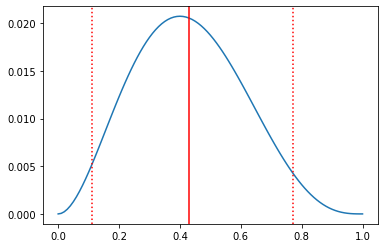

In [105]:
# example 5 coin tosses, 2 heads, 3 coins, what is the p of the coin?

N= 101
p = np.linspace(0,1,N) # make a grid fo the possible values from 0,1
prior = np.ones_like(p)/N # assing uniform prior
# calculate likelihood, which is binom dist
#  and we don't have to worry about the comb n,k constant in front 
lik = p**2*(1-p)**3
h = prior * lik
Z = np.sum(h)
post = h/Z

F = np.cumsum(post)
dist = np.abs(F-0.025)
left = p[dist == np.min(dist)][0]
dist = np.abs(F-0.975)
right = p[dist == np.min(dist)][0]

mean = np.sum(post*p)

plt.plot(p,  post)
plt.axvline(x=mean, color="r")
plt.axvline(x=left, color="r", linestyle=":")
plt.axvline(x=right, color="r", linestyle=":")

print(f"p = {mean} [{left}, {right}]")

Luckily, if everything is "normal" (read Gaussian) frequentists and Bayesianists agree. However, you can find cases where the difference is striking.

The Bayesian result is the posterior which is the probability density, it's a distribution. What is the best "point estimate" of the distribution? So far we used the expected value (the mean), but we can also use the point with the maximal value of the probability or the median (the area under the posterior to the left equals to the area to the right). It depends on our problem and how we penalise ourselves for being wrong. *Being wrong* is usually described with the (custom) definition of the **loss function**:

- **mean** (expected value) is used if the loss function is $L_2$-norm $\equiv \Sigma_i (x_i - \hat{x})^2$. This is the most commonly used.
- **median** is used if the "loss function" is $L_1$-norm, the outliers are not so dramatically serious $\equiv \Sigma_i |x_i - \hat{x}|$
- **mode** (point of the maximum) if the "loss function" is "all or nothing", all wrong answers are equally bad $\equiv \Sigma_i 1-\delta(x_i -\hat{x})$ If you shoot a rabbit for dinner there is no difference if you miss by 20cm or by 2m.

Again, in the normal Gaussian world they are all equal.

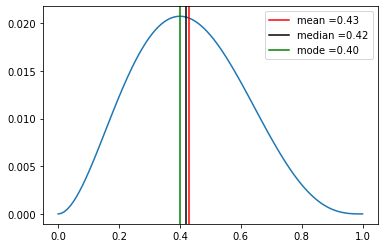

In [109]:
post_mean = np.sum(post*p)
post_mode = p[np.argmax(post)]
F = np.cumsum(post)
dist = np.abs(F-0.5)
post_median = p[dist == min(dist)]

plt.plot(p,  post)
plt.axvline(x=post_mean, color='r', label="mean =%.2f"%post_mean)
plt.axvline(x=post_median, color='k', label="median =%.2f"%post_median)
plt.axvline(x=post_mode, color='g', label="mode =%.2f"%post_mode)
plt.legend();

### Pathological example of credible vs confidence interval

Imagine there is an inhibitor that prevents a liquid to explode for amount of time $\theta$. After this amount of guaranteed time $\theta$ it is going to explode shortly with exponential distribution. The  model is

$p(x | \theta) = \exp (\theta - x)$ &nbsp; for $x\geq \theta$

$p(x | \theta) = 0$ otherwise

We have observed three outcomes of the experiment, explosions occurred at times $x=[12, 14, 16]$ and we want to derive the time $\theta$ for which the inhibitor works perfectly - given our data $P(\theta | x)$.

In the Bayes theorem we will  need the likelihood

$\mathscr{L} = P(x | \theta) = \prod\limits_{i}^{} \exp(\theta - x_i)$ for all $x \geq \theta$, &nbsp; $0$ otherwise 

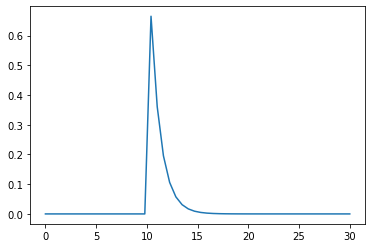

In [99]:
# How the model looks for theta = 10
theta = 10
x = np.linspace(0,30)
prob = np.exp(theta - x)
prob[x<theta] = 0.0
plt.plot(x, prob);

11.671641667041664
[11.0, 11.98]


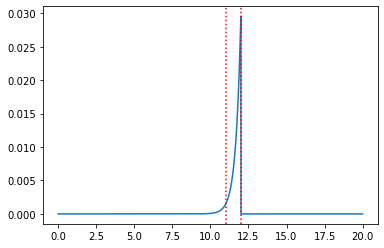

In [25]:
data = np.array([12,14,16])
theta = np.arange(0,20,0.01)
prior = np.ones_like(theta)
prior = prior/np.sum(prior)
lik = np.exp(data.size*theta - np.sum(data)) # bit of algebra
lik[theta > np.min(data)] = 0
h = prior*lik
Z = np.sum(h)
post = h/Z

# 90% confidence interval
F = np.cumsum(post)
dist = np.abs(F-0.05)
left = theta[dist == np.min(dist)][0]
dist = np.abs(F-0.95)
right = theta[dist == np.min(dist)][0]

plt.plot(theta, post)
plt.axvline(x=left, color="r", linestyle=":")
plt.axvline(x=right, color="r", linestyle=":")

print(np.sum(post*theta))
print(f"[{left}, {right}]")

In the frequentist approach, you can have an *estimator*

$\theta^* = \frac{1}{N} \Sigma_i (x_i -1)$

and some very smart theorist computed that the boundaries for this problem are $[\theta^* - 0.8529, \theta^* + 0.8264]$

13.0
[12.1471, 13.8204]


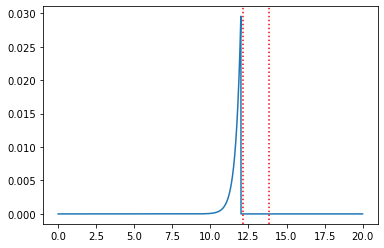

In [26]:
theta_star = np.mean(data -1)
left = theta_star  - 0.8529
right = theta_star + 0.8204

plt.plot(theta, post)
plt.axvline(x=left, color="r", linestyle=":")
plt.axvline(x=right, color="r", linestyle=":")
print(theta_star)
print(f"[{left}, {right}]")

That's clearly **wrong**! Just from common sense we know that $\theta$ **cannot** be higher than 12 because we observed the time 12 in our data!

In [27]:
# Let's simulate it
c = 0
N = 10000
theta = 11
#for i in range(N):
# let's simulate all N at once without the for loop
x = theta + np.random.exponential(size=(3,N))
theta_star = np.mean(x -1.,axis=0)
left = theta_star  - 0.8529
right = theta_star + 0.8204
inside = (theta > left) & (theta < right)
#if inside:
#    c += 1
np.count_nonzero(inside)/N
#print(c/N)

0.8969

It's exactly what it says it is. If we run the experiment many times, the generated data (random data generated from the fixed ground true  model defined by $\theta = 10$) would lead to the calculation of the confidence interval where in 90\% of cases the true value of the parameter $\theta$ lies in the interval.


In our example case, we just happened to observe the data $[12,14,16]$ that happened to be from the remaining 10\% of the experiments.

## Bayesian model selection
### The difference between model fitting and model selection

*Model fitting* assumes the particular model is true, and tuning the model so it provides the best possible fit to the data of the given model.

*Model selection* asks the question of whether the assumptions of the model are compatible with the data.

Linear model $M_1$ vs. quadratic model $M_2$

$$
y_{M_1}(x;\theta) = \theta_0 + \theta_1 x
$$

$$
y_{M_2}(x;\theta) = \theta_0 + \theta_1 x + \theta_2 x^2\\
$$



In [28]:
def generate_data(N=20, rseed=1):
    rng = np.random.RandomState(rseed)
    x = rng.rand(N)
    sigma_y = 0.1 * np.ones(N)
    
    # linear model with noise
    y = x - 0.2 + sigma_y * rng.randn(N)
    return np.vstack([x, y, sigma_y]).round(2)

data = generate_data()
x, y, sigma_y = data

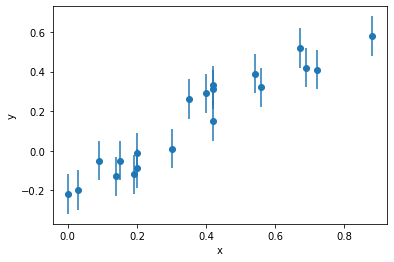

In [29]:
plt.errorbar(x, y, sigma_y, fmt="o")
plt.xlabel('x')
plt.ylabel('y');

In [30]:
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    return sum(t * x ** n for (n, t) in enumerate(theta))

In [31]:
# function which computes the log-likelihood for the models

from scipy import stats

def logL(theta, model=polynomial_fit, data=data):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(stats.norm.logpdf(*args)
               for args in zip(y, y_fit, sigma_y))

In [32]:
from scipy import optimize

def best_theta(degree, model=polynomial_fit, data=data):
    theta_0 = (degree + 1) * [0]
    neg_logL = lambda theta: -logL(theta, model, data)
    return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)

theta1 = best_theta(1)
theta2 = best_theta(2)

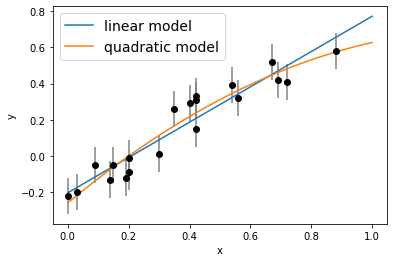

In [33]:
xfit = np.linspace(0, 1, 1000)
plt.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
plt.plot(xfit, polynomial_fit(theta1, xfit), label='linear model')
plt.plot(xfit, polynomial_fit(theta2, xfit), label='quadratic model')
plt.legend(loc='best', fontsize=14)
plt.xlabel('x'); plt.ylabel('y');

Naive Approach: Comparing Likelihoods

In [34]:
print("linear model:    logL =", logL(best_theta(1)))
print("quadratic model: logL =", logL(best_theta(2)))

linear model:    logL = 22.01086700661255
quadratic model: logL = 22.94151358650395


The quadratic model yields a higher log-likelihood, but this **does not** necessarily mean it is the better model!

The quadratic model has more degrees of freedom than the linear model, and thus will **always** give an equal or larger maximum likelihood, regardless of the data!

We have talked over-fitting in one of the previous lectures...

There exist some treatments, i.e. the **Akaike Information Criterion** that corrects the likelihood for the degrees of freedom...

### Reminder of Bayesian vs Frequentist philosophies

Frequentists consider **probabilities as frequencies**: that is, a probability is only meaningful in the context of repeated experiments (even if those repetitions are hypothetical).

- *observed data* are considered to be random variables: if you make the observations again under similar circumstances, the data may be different, and the details depend on the generating distribution.
- *model parameters* (those things that help define the generating distribution) are considered fixed: they aren't subject to a probability distribution; they just *are*.

Bayesians consider **probabilities as degrees-of-belief**: that is, a probability is a way of quantifying our certainty about a particular statement.

- *observed data* are not directly considered as random variables; they just *are*.
- *model parameters* are uncertain quantities and thus subject to probabilistic description.

In the model fitting context:

- frequentists look at the *likelihood*: $P(D~|~\theta, M)$
- Bayesians look at the *posterior*: $P(\theta~|~D, M)$

### Model Selection: Frequentists Approach

We have discussed this already, recall $\chi^2$ distribution, the difference of the $\chi^2$ and its p-value...

### Model Selection: Bayesian Approach

First, using Mr Bayes:

$$
P(M~|~D) = P(D~|~M)\frac{P(M)}{P(D)}
$$

Using the definition of conditional probability, the first term can be expressed as an integral over the parameter space of the likelihood:

$$
P(D~|~M) = \int_\Omega P(D~|~\theta, M) P(\theta~|~M) d\theta
$$

The remaining terms are priors, the most problematic of which is $P(D)$ – the prior probability of seeing your data *without reference to any model*.

Not sure that $P(D)$ could ever be actually computed in the real world, but fortunately it can be canceled by computing the *odds ratio* between two alternative models:

$$
O_{21} \equiv \frac{P(M_2~|~D)}{P(M_1~|~D)} = \frac{P(D~|~M_2)}{P(D~|~M_1)}\frac{P(M_2)}{P(M_1)}
$$

A way of comparing two models: an integral over the likelihood, and a prior odds for each model.
Often the ratio of prior odds is assumed to be $P(M_1)/P(M_2) \sim 1$, leaving only the well-defined (but often computationally intensive) integral over likelihood for each model.

The ratio $P(D~|~M_2) / P(D~|~M_1)$ is the *Bayes factor*

Notice, that for model selection, the frequentists are also working with the quantity $P(D~|~M)$. But unlike Bayesians, they *cannot* express this as an integral over parameter space, because the notion of a probability distribution over model parameters does not make sense in the frequentist context. The parameter space is only one ground true paramater vector.

Use an MCMC to draw samples (emcee) from the posterior in order to solve the model fitting problem. The emcee package requires to first define functions which compute the prior, likelihood, and posterior under each model:

In [35]:
def log_prior(theta):
    # size of theta determines the model.
    # flat prior over a large range
    if np.any(abs(theta) > 100):
        return -np.inf  # log(0)
    else:
        return 200 ** -len(theta)

def log_likelihood(theta, data=data):
    x, y, sigma_y = data
    yM = polynomial_fit(theta, x)
    return -0.5 * np.sum(np.log(2 * np.pi * sigma_y ** 2)
                         + (y - yM) ** 2 / sigma_y ** 2)

def log_posterior(theta, data=data):
    theta = np.asarray(theta)
    return log_prior(theta) + log_likelihood(theta, data)

In [36]:
# we draw samples from the posterior using MCMC

import emcee

def compute_mcmc(degree, data=data,
                   log_posterior=log_posterior,
                   nwalkers=50, nburn=1000, nsteps=2000):
    ndim = degree + 1  # this determines the model
    rng = np.random.RandomState(0)
    starting_guesses = rng.randn(nwalkers, ndim)
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data])
    sampler.run_mcmc(starting_guesses, nsteps)
    trace = sampler.chain[:, nburn:, :].reshape(-1, ndim)
    return trace

trace_2D = compute_mcmc(1)
trace_3D = compute_mcmc(2)

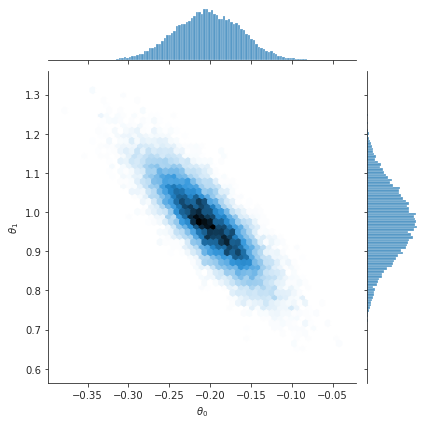

In [37]:
import seaborn as sns; # sns.set()
import pandas as pd
columns = [r'$\theta_{0}$'.format(i) for i in range(3)]
df_2D = pd.DataFrame(trace_2D, columns=columns[:2])

with sns.axes_style('ticks'):
    jointplot = sns.jointplot(x=r'$\theta_0$', y=r'$\theta_1$',
                              data=df_2D, kind="hex");

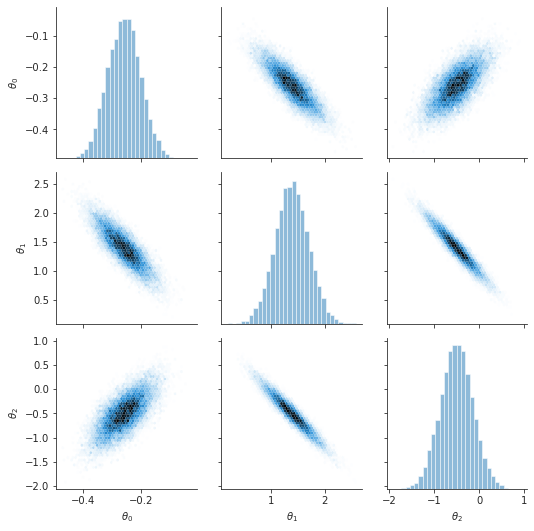

In [38]:
df_3D = pd.DataFrame(trace_3D, columns=columns[:3])

# get the colormap from the joint plot above
cmap = jointplot.ax_joint.collections[0].get_cmap()

with sns.axes_style('ticks'):
    grid = sns.PairGrid(df_3D)
    grid.map_diag(plt.hist, bins=30, alpha=0.5)
    grid.map_offdiag(plt.hexbin, gridsize=50, linewidths=0, cmap=cmap)

These samples give us a good idea of what the posterior for each model looks like, but we still must integrate this posterior to find the Bayes factor.

In [39]:
from scipy import integrate

def integrate_posterior_2D(log_posterior, xlim, ylim, data=data):
    func = lambda theta1, theta0: np.exp(log_posterior([theta0, theta1], data))
    return integrate.dblquad(func, xlim[0], xlim[1],
                             lambda x: ylim[0], lambda x: ylim[1])

def integrate_posterior_3D(log_posterior, xlim, ylim, zlim, data=data):
    func = lambda theta2, theta1, theta0: np.exp(log_posterior([theta0, theta1, theta2], data))
    return integrate.tplquad(func, xlim[0], xlim[1],
                             lambda x: ylim[0], lambda x: ylim[1],
                             lambda x, y: zlim[0], lambda x, y: zlim[1])

In [40]:
xlim, ylim = zip(trace_2D.min(0), trace_2D.max(0))
Z1, err_Z1 = integrate_posterior_2D(log_posterior, xlim, ylim)
print("Z1 =", Z1, "+/-", err_Z1)

Z1 = 46946832.098683774 +/- 2.8586454416872584


In [41]:
xlim, ylim, zlim = zip(trace_3D.min(0), trace_3D.max(0))
Z2, err_Z2 = integrate_posterior_3D(log_posterior, xlim, ylim, zlim)
print("Z2 =", Z2, "+/-", err_Z2)

Z2 = 111097246.28223856 +/- 14.523670518770814


In [42]:
print("Bayes factor:", Z2 / Z1)

Bayes factor: 2.366448199288687


In [43]:
print('Bayesian "p-value":', Z1 / (Z1 + Z2))

Bayesian "p-value": 0.29704897886481507


The posterior probability in favor of the linear model is about 30%, which is not low enough to support rejecting the simpler model.

Keep in mind, this is not a true p-value in the meaning of the p-value definition...

Advantage is that unlike in frequentism the Bayesian approach is general and we do not have to remember all the tests and distributions.

Also notice, that the posteriors it's independent of the number of parameters, you get rid of  them by intergration over all $d\theta$'s.

### Null Hypothesis Testing
You remember the "classical" p-value that suggests to reject or not reject the *null hypothesis $H_0$.

In Bayesian framework the hypothesis testing can be done in much more simple and natural way:

- assign the prior probability 0.5 to the null hypothesis $H_0$ and 0.5 to non-$H_0$ which is everything else.
- do the standard Bayesian analysis to get the posterior. If the posterior probability of $H_0$ is higher than the original prior of $H_0$ it speaks for the $H_0$, otherwise the belief to $H_0$ is lowered.

An example: We tossed a coin 250 times and got heads 140 times. Is it a fair coin? In other words, the null hypothesis asks if $p=0.5$?

In [94]:
import numpy as np
N = 11
p = np.linspace(0,1,N)
prior = np.ones_like(p)*0.5/(len(p)-1)
prior[np.abs(p - 0.5) < 1e-6] = 0.5
# to be sure it's numericlly ok, it's like saying prior[p==0.5] = 0.5
prior, np.sum(prior)

(array([0.05, 0.05, 0.05, 0.05, 0.05, 0.5 , 0.05, 0.05, 0.05, 0.05, 0.05]),
 1.0000000000000002)

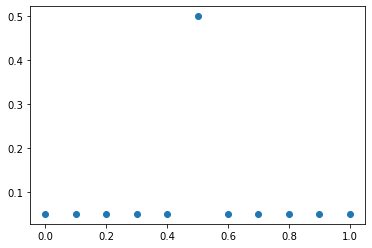

In [96]:
plt.plot(p, prior,"o")

In [97]:
from scipy.stats import binom
lik = binom.pmf(140,250,p)
h = prior*lik
Z = np.sum(h)
post = h/Z
post

array([0.00000000e+00, 1.32328875e-71, 4.35588640e-35, 8.17972391e-17,
       1.09651584e-06, 7.89731875e-01, 2.10258074e-01, 8.95451780e-06,
       5.02199510e-17, 5.60957430e-43, 0.00000000e+00])

In [51]:
post[5] # it's higher than the prior, null hypothesis is ok

0.7897318745256972

Note: If you set the prior of some parameter value to 1 it means that all the other values have probability 0, so they cannot happen and no amount data can shift your sure initial belief, not even a little bit.

In other words $0.9999999 \neq 1$
If something is very unlikely, you can use $10^{-10}$ but $\gt 0$ and the same for very likely event, don't assing the prior to $1$, leave some space for uncertainty.

### Solution to the Earthquake exercise

In [52]:
from scipy.stats import poisson

In [53]:
# frequentist approach: lambda = 20 in 20 000 years, fixed!
lambda_fixed = 20
freq_prob = 1.-poisson.pmf(0,50/20000*lambda_fixed)
freq_prob

0.048770575499285984

In [54]:
# Let's be Bayesian

N = 100
lam = np.linspace(1,100,N)
prior = np.ones_like(lam)/N
# print(prior)
np.sum(prior) # sanity check

0.9999999999999999

In [55]:
# Likelihood P( data | model ) :
# P(x, lambda) = lambda^x exp(-lambda) / x!
lik = poisson.pmf(20,lam)

In [56]:
h = prior * lik
Z  = np.sum(h) # norm. factor
post = h/Z # posterior

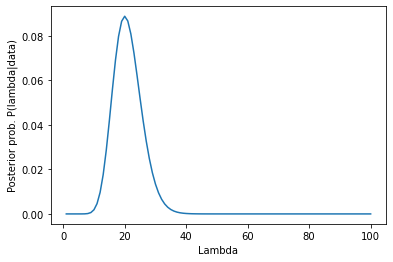

In [57]:
plt.plot(lam, post)
plt.xlabel("Lambda")
plt.ylabel("Posterior prob. P(lambda|data)");
# The Poisson model is fully determined by lambda parameter

In [58]:
np.sum(lam*post)

21.000000000000007

Bayes: integrate over all possible lambda's to get the mean (expected) value, $$\mathbb E[x] = \int x p(x) dx$$

In [59]:
prob = 1.- poisson.pmf(0, 50/20000*lam) # for all possible lambda's
bayes_prob = np.sum(post*prob)
bayes_prob

0.05108351192968037

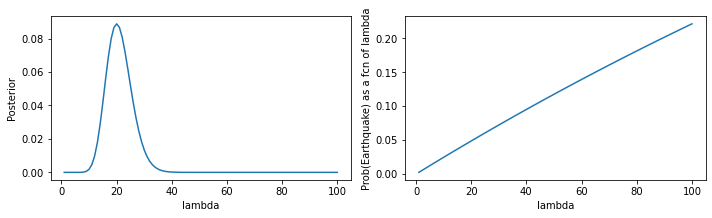

In [60]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(lam, post)
plt.xlabel("lambda")
plt.ylabel("Posterior")
plt.subplot(122)
plt.plot(lam, prob)
plt.xlabel("lambda")
plt.ylabel("Prob(Earthquake) as a fcn of lambda")
plt.tight_layout()

As an improvement you can use log-uniform proir, which is equivalent to changing from $x$ to $1/x$

It's handy if  the $x$-paramter spans over many orders of magnitude.

*What is the length of a string? It's twice the length from the middle to the end.*

In [61]:
# Try log-uniform prior
N = 100
lam = np.linspace(1,100,N)
prior = 1./lam # log-uniform prior
prior = prior/np.sum(prior) # normalise it
lik = poisson.pmf(20,lam)
h = prior * lik
Z  = np.sum(h) # norm. factor
post = h/Z # posterior

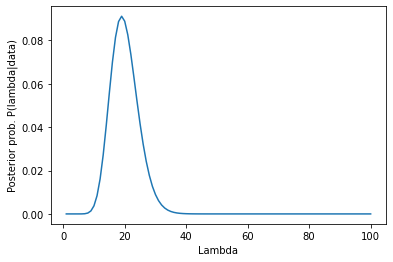

In [62]:
plt.plot(lam, post)
plt.xlabel("Lambda")
plt.ylabel("Posterior prob. P(lambda|data)");

In [63]:
prob = 1.- poisson.pmf(0, 50/20000.*lam) # for all possible lambda's
bayes_prob = np.sum(post*prob)
bayes_prob

0.04871122070950458

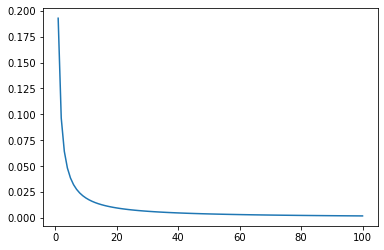

In [64]:
plt.plot(lam, prior)

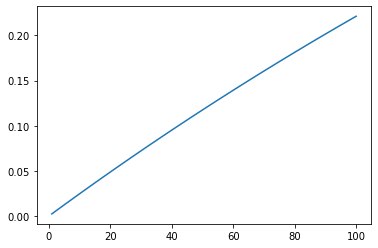

In [65]:
plt.plot(lam, prob)

### Redo the Bayes' billiard game numerically

In [66]:
from scipy.stats import binom

In [67]:
N = 100
p = np.linspace(0,1,N)
step = 1./N # p[1]-p[0]
prior = np.ones_like(p)/N
np.sum(prior), step

(0.9999999999999999, 0.01)

In [68]:
n, k = 8, 5
lik = binom.pmf(k, n, p)

In [69]:
h = prior * lik
Z  = step*np.sum(h) # norm. factor
post = h/Z # posterior
step*np.sum(post)

0.9999999999999999

In [70]:
prob = binom.pmf(3,3,1-p)
bayes_prob = step*np.sum(post*prob)
bayes_prob

0.09090908693428822

In [71]:
step*np.sum(post*p), 5/8.

(0.6000000174712986, 0.625)

### Exercise: How many tanks do Germans have? (this part is experimental, I am open to your comments)

<img src="figures/german_tank.jpg" width="50%">

Imagine the tanks have serial numbers from 1 to N. We (in the WW2) captured 1 tank number, that has a serial number 42. How many tanks Germans likely have? Can we make an estimate?

In [72]:
N=2000 # let's assume the maximal population of tanks
n = np.linspace(0,N,N+1) # all possibilities

prior = np.ones_like(n)/(N+1) # each number is equally probable

In [73]:
x = 42 # observed serial number

In [74]:
# likelihood = chance to observed data (x=42) given the model n
# for n = 0 .. x-1 the chance is 0
# for 42 <= n we assume the chance to observe
# a particular tank serial number is uniformly distributed

lik = np.zeros_like(n)
lik[x+1:]= 1./n[x+1:] # +1 because indixing starts at 0
lik[43], 1./43. # sanity check
# = prob to observe tank 42 if there is 43 tanks in total

(0.023255813953488372, 0.023255813953488372)

In [75]:
h = lik*prior
Z = np.sum(h)
post = h/Z

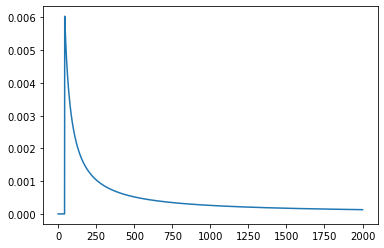

In [76]:
plt.plot(n, post)

In [77]:
np.sum(post*n ) # expected value

508.35682316875864

An important observation is that the basic *maximal likelihood estimator* would give you the most probable value of the likelihood, which 42 (the prior was flat, therefore the shape of the posterior $\propto$ likelihood). From common sense, it is weird that you would see by chance the highest number.

Official answer of the estimate from [Wiki - German Tank Problem](https://military.wikia.org/wiki/German_tank_problem) is
$$N \approx m -1 + m/k$$
where $m$ is the highest tank number observed and $k$ is the numbere of tanks. The approach on the Wiki is different. Comments?

In [78]:
m, k = 42., 1.
m-1 + m/k

83.0

So it's a different result. Actually, our result depends how far we extent the maximal number of tanks (these high values have low probabilities but since there is many of them they pile up, the decay $1/n$ is not fast enough to kill it), while the Wiki estimate is "$N$-free", which is kind of counter-intuitive to me.

My guess is that we would need a steeper than $1/n$ decay to have a finite sum. Would observing more tanks help? And therefore, the Wiki estimate holds only for $k > 1$?

If we observed $k$ tanks, can we just sort them and go one by one updating the belief using the previous estimate as a new prior?

In [79]:
prior2 = post
x2 = 60
lik2 = np.zeros_like(n)
lik2[x2+1:]= 1./n[x2+1:]
h2 = lik2*prior2
Z2 = np.sum(h2)
post2 = h2/Z2
np.sum(post2*n)

218.26494325274373

In [80]:
m, k = 60., 2.
m-1 + m/k

89.0

In [81]:
import emcee

In [82]:
x_obs = 42

def log_prior(n):
    if np.any(n <= 2000):
        return 1.  # flat prior
    else:
        return  -np.inf
    
def log_likelihood(n):
    if np.any(n < x_obs):
        return -np.inf  # log(0)
    else:
        return -np.log(n)
    
#     return -0.5 * np.sum(np.log(2 * np.pi * e ** 2)
#                          + (F - theta[0]) ** 2 / e ** 2)

def log_posterior(n):
    return log_prior(n) + log_likelihood(n)

In [83]:
import emcee

ndim = 1  # number of parameters in the model
nwalkers = 5  # number of MCMC walkers
nburn = 2000  # "burn-in" period to let chains stabilize
nsteps = 20000  # number of MCMC steps to take

# we'll start at random locations between 0 and 2000
starting_guesses =  (2000-x_obs) * np.random.rand(nwalkers, ndim) + x_obs

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].ravel()  # discard burn-in points

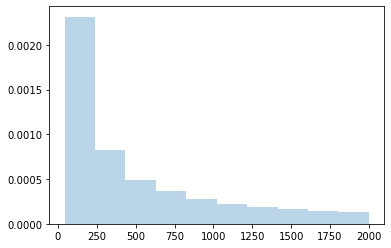

In [84]:
# plot a histogram of the sample
plt.hist(sample, alpha=0.3, density=True);

In [85]:
np.mean(sample)

494.9574023639013

In [86]:
x_obs = [42, 60,200, 150]
m = max(x_obs)
k = len(x_obs)
upper_bound = 3000

from scipy.special import binom

def log_prior(n):
    if np.any(m <= n <= upper_bound):
        return 1.  # flat prior
    else:
        return  -np.inf
    
def log_likelihood(n):
    if np.any(n < m):
        return -np.inf  # log(0)
    else:
        return -k*np.log(n)
    
#     return -0.5 * np.sum(np.log(2 * np.pi * e ** 2)
#                          + (F - theta[0]) ** 2 / e ** 2)

def log_posterior(n):
    return log_prior(n) + log_likelihood(n)

In [87]:
ndim = 1
nwalkers = 5
nburn = 2000
nsteps = 10000

In [88]:
p0 =  (upper_bound-m)*np.random.rand(nwalkers, ndim)  + m
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[])

sampler.run_mcmc(p0, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].ravel()  # discard burn-in points

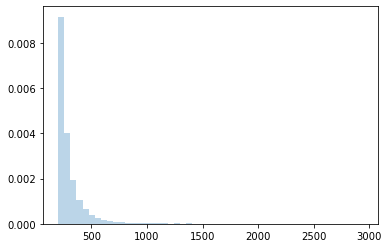

In [91]:
plt.hist(sample, bins=50,alpha=0.3, density=True);

In [92]:
np.mean(sample)

305.29482423853335

### Laplace's probability that the Sun will rise tomorrow
I owe you the derivation of the Laplace probability that the Sun will rise tomorrow $P(X) = (r+1)/(n+2)$ if we have observed that it has risen $r$ times out of $n$ trials.

Setup: There is $p$ probability that the Sun either rises (1) or not (0):

$$p(\theta|x) \propto p^r (1-p)^{n-r}$$

Some posteriors are known analytically, e.g. it is known that the postereior of the Binomial distribution is the $\beta$-distribution $\mathbb{B}$ (we saw it in the coin example earlieer):

$$\mathbb{B}(x, \alpha, \beta) \equiv p(x|\alpha, \beta) = \frac{1}{B(\alpha, \beta)} x^{\alpha-1} (1-x)^{\beta-1}$$

where $B(\alpha, \beta)$ is the normalisation. It can be shown that the expected value of the $\mathbb{B}$-distribution $\mathbb{E}[\mathbb{B}] = \frac{\alpha}{\alpha+\beta}$.

Plugging in the numbers $\alpha = r+1$ and $\beta = n -r +1$ we get

$$P(X) = \frac{r+1}{n+2}$$

So you are never 100% sure about tomorrow...

Note again, that in the frequentist's point of view, since the Sun has so far always risen every day up to now, the probability would be $r/n=1$, not $(r+1)/(n+2) = 0.999999999999...$